# 2023 인공지능연구회 강습회 실습
# (강사: 숙명여자대학교 심주용 - 2023.08.16)
# Lab1: ANN

참고: colab tutorial
https://colab.research.google.com/drive/16pBJQePbqkz3QFV54L4NIkOn1kwpuRrj


In [25]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.12.0


# 1.MNIST Example


https://i-systems.github.io/teaching/DL/iNotes_tf2/05_ANN_03_tf2.html

https://www.tensorflow.org/tutorials/quickstart/beginner

- What's an MNIST?
From Wikipedia

The MNIST database (Mixed National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. It was created by "re-mixing" the samples from NIST's original datasets. The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, NIST's complete dataset was too hard.
MNIST (Mixed National Institute of Standards and Technology database) database
Handwritten digit database
28×28
  gray scaled image
Flattened matrix into a vector of  28×28=784


![](https://raw.githubusercontent.com/jooyongsim/AI_tutorials_2023/main/photos/mnist.png)






More here: http://yann.lecun.com/exdb/mnist/

We will be using MNIST to create a Multinomial Classifier that can detect if the MNIST image shown is a member of class 0,1,2,3,4,5,6,7,8 or 9. Susinctly, we're teaching a computer to recognize hand written digets.


The training data set is:

(60000, 28, 28)
(60000,)
The test data set is:
(10000, 28, 28)
(10000,)


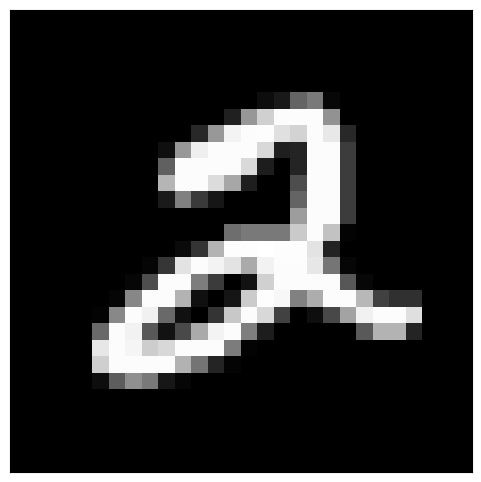

label for the image: 2


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

mnist = tf.keras.datasets.mnist

(train_x, train_y), (test_x, test_y) = mnist.load_data()

train_x, test_x = train_x/255.0, test_x/255.0
print ("The training data set is:\n")
print (train_x.shape)
print (train_y.shape)

print ("The test data set is:")
print (test_x.shape)
print (test_y.shape)

img = np.reshape(train_x[5], (28,28))
img = train_x[5].reshape(28,28)
# So now we have a 28x28 matrix, where each element is an intensity level from 0 to 1.

plt.figure(figsize = (6,6))
plt.imshow(img, 'gray')
plt.xticks([])
plt.yticks([])
plt.show()

print('label for the image:', train_y[5])


## 1.1. Define an ANN Structure

[Sequential](https://www.tensorflow.org/guide/keras/sequential_model) is useful for stacking layers where each layer has one input tensor and one output tensor. Layers are functions with a known mathematical structure that can be reused and have trainable variables. Most TensorFlow models are composed of layers. This model uses the [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten), [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense), and [Dropout](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) layers.

Parameters to be set:
- Input size
- Hidden layer size
- The number of classes

Define Weights, Biases, and Placeholder.
Initialize with normal distribution with $\mu=0$
  and $\sigma=0.1$

In [27]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(units = 100, activation = 'relu'),
    tf.keras.layers.Dense(units = 10, activation = 'softmax')
])

## 1.2. Define Loss and Optimizer
**Loss**

This defines how we measure how accurate the model is during training. As was covered in lecture, during training we want to minimize this function, which will "steer" the model in the right direction.

- Classification: Cross entropy

Equivalent to apply logistic regression

$ \displaystyle \ell{(w)}  =  \frac{1}{m} \sum_{i=1}^m y_i \log{(h_w(x_i))} + (1 - y_i) \log(1 - h_w(x_i)) $

**Optimizer**

This defines how the model is updated based on the data it sees and its loss function.
AdamOptimizer: the most popular optimizer

In [28]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

model.compile(optimizer = 'adam',
              loss = loss_fn,
              metrics = ['accuracy'])

# Train Model
loss = model.fit(train_x, train_y, epochs = 5)
test_loss, test_acc = model.evaluate(test_x, test_y)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2689 - accuracy: 0.9221
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1226 - accuracy: 0.9640
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0853 - accuracy: 0.9744
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0660 - accuracy: 0.9799
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0829 - accuracy: 0.9749


## 1.3. Test or Evaluate


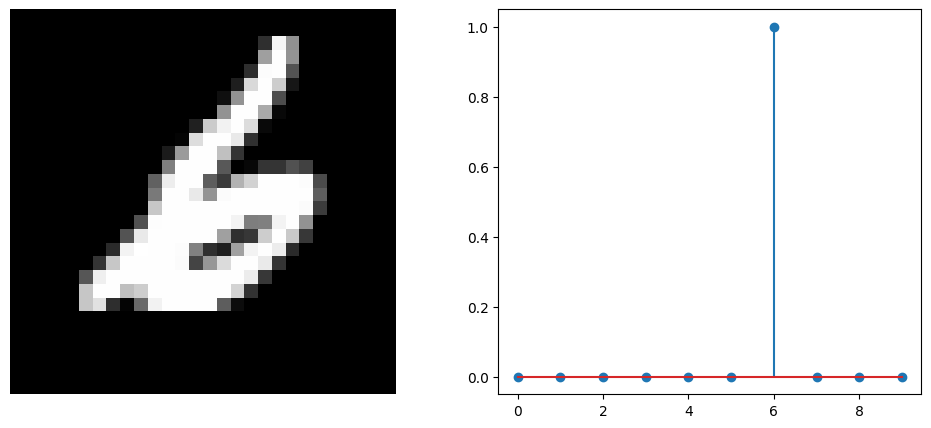

Prediction : 6


In [29]:
test_img = test_x[np.random.choice(test_x.shape[0], 1)]

predict = model.predict_on_batch(test_img)
mypred = np.argmax(predict, axis = 1)

plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
plt.imshow(test_img.reshape(28, 28), 'gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.stem(predict[0])
plt.show()

print('Prediction : {}'.format(mypred[0]))

# 2.Machine Learning with TensorFlow

https://www.tensorflow.org/tutorials/quickstart/advanced

## 2.1 Gradient Tape
The **Gradient Tape** is a core feature in TensorFlow used for automatic differentiation, allowing us to compute gradients with respect to some given inputs. This is extremely useful in training machine learning models via gradient-based optimization techniques. Here's a tutorial to help you understand how to work with Gradient Tape in TensorFlow:

$x = x^2$

Gradient Tape Reference: https://www.tensorflow.org/api_docs/python/tf/GradientTape/

 ![GT](https://raw.githubusercontent.com/jooyongsim/AI_tutorials_2023/main/photos/gradient_tape.png)

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
plt.rcParams['figure.figsize'] = [7, 6]


In [31]:
x = tf.Variable([[5]], dtype = tf.float32)
with tf.GradientTape() as tape:
  y = x * x
dy_dx = tape.gradient(y, x)
print(dy_dx)

tf.Tensor([[10.]], shape=(1, 1), dtype=float32)


## 2.2. Linear Regression

Given  $x$ and  $y$, we want to estimate $w$ and $b$

**$\hat{y}=wx+b$**

### **Given Variables**

- $ x $ and $ y $: These are variables representing input and output in a dataset. Typically, $ x $ is an independent variable (e.g., a feature of the data), and $ y $ is a dependent variable (e.g., a label or target to be predicted).




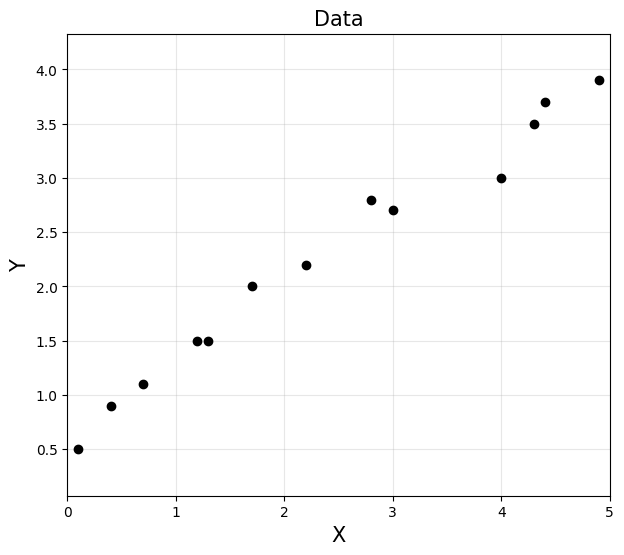

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Creating data points as column vectors
# train_x and train_y represent the input and output of the training data
train_x = np.array([0.1, 0.4, 0.7, 1.2, 1.3, 1.7, 2.2, 2.8, 3.0, 4.0, 4.3, 4.4, 4.9]).reshape(-1, 1)
train_y = np.array([0.5, 0.9, 1.1, 1.5, 1.5, 2.0, 2.2, 2.8, 2.7, 3.0, 3.5, 3.7, 3.9]).reshape(-1, 1)

# Storing the number of training examples
m = train_x.shape[0]

plt.figure()
plt.plot(train_x, train_y, 'ko')
plt.title('Data', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.xlim([0, 5])
plt.show()

### Optimzation

### **Objective**

- **Estimating $ w $ and $ b $**: The goal of linear regression is to find the values of the weight $ w $ and bias $ b $ that best describe the relationship between $ x $ and $ y $. These values define a linear function that models the data.

### **Data Points**

- **Given $ (x_i, y_i) $ for $ i = 1, \ldots, m $**: This means that there are $ m $ pairs of corresponding input and output data points, with $ x_i $ representing the $ i $-th input and $ y_i $ representing the $ i $-th output.

###**Linear Relationship**

- **$ y_i = wx_i + b $**: This equation defines a linear relationship between the input $ x_i $ and the output $ y_i $, where $ w $ is the slope or weight, and $ b $ is the y-intercept or bias. This is the equation of a straight line, and the goal is to find the values of $ w $ and $ b $ that best fit the given data.

### **Objective Function**

- **$ \displaystyle \min_{w,b}{\sum_{i=1}^{n}{(\hat{y_i}−y_i)^2}} $**: This is the objective function for linear regression, also known as the loss function. It represents the sum of the squared differences between the predicted values $\hat{y_i}$ (calculated as $ wx_i + b $) and the actual values $ y_i $. The goal is to find the values of $ w $ and $ b $ that minimize this sum, hence the use of the $\min$ symbol.



 optimal w = [[0.74257565]]

 optimal b = [[0.41717836]]


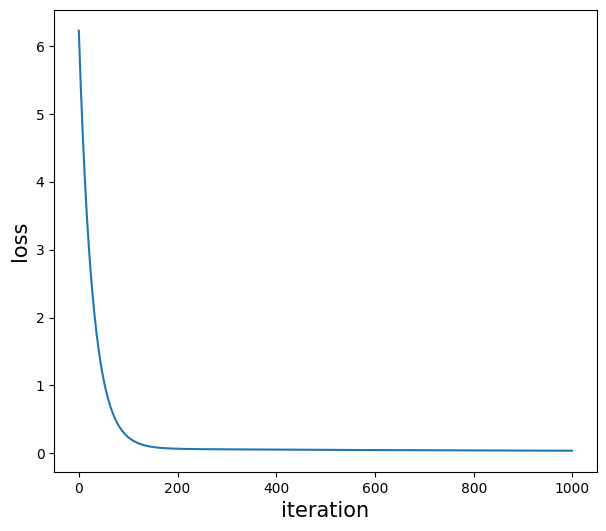

In [33]:
LR = 0.001
n_iter = 10000

w = tf.Variable([[0]], dtype = tf.float32)
b = tf.Variable([[0]], dtype = tf.float32)

loss_record = []
for i in range(1000):
    with tf.GradientTape() as tape:
        cost = tf.reduce_mean(tf.square(w*train_x + b - train_y))
        w_grad, b_grad = tape.gradient(cost, [w,b])

    loss_record.append(cost)
    w.assign_sub(LR * w_grad) # w = w - LR*w_grad
    b.assign_sub(LR * b_grad) # b = b - LR*b_grad
print("\n optimal w =", w.numpy())
print("\n optimal b =", b.numpy())
w_val = w.numpy()
b_val = b.numpy()

plt.figure()
plt.plot(loss_record)
plt.xlabel('iteration', fontsize = 15)
plt.ylabel('loss', fontsize = 15)
plt.show()

### Prediction
We will outline a simple linear regression problem. Given a set of data points $ (x_i, y_i) $, the task is to find the best-fitting straight line described by the equation $ y_i = wx_i + b $. The "best" line is determined by minimizing the sum of the squared differences between the predicted values and the actual values, as expressed in the given objective function.

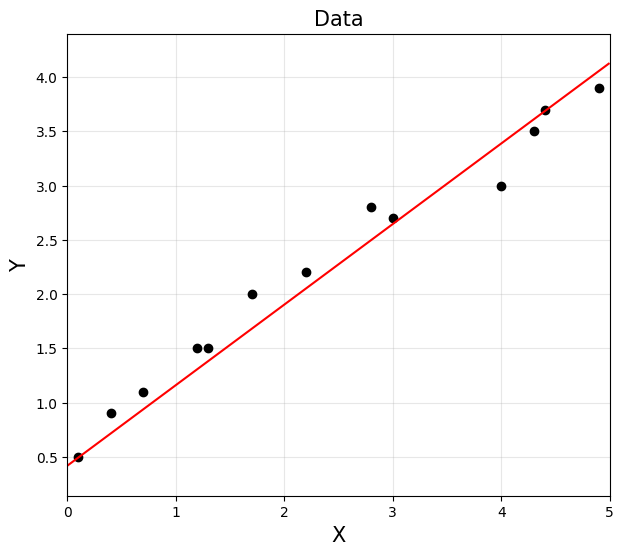

In [34]:
xp = np.arange(0, 5, 0.01).reshape(-1, 1)
yp = w_val*xp + b_val

plt.figure()
plt.plot(train_x, train_y, 'ko')
plt.plot(xp, yp, 'r')
plt.title('Data', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.xlim([0, 5])
plt.show()

## 2.3. Logistic Regression

Train a logistic regression model to classify the generated data points. This involves defining the logistic loss function and utilizing gradient descent to minimize this loss:

$ \displaystyle \ell{(w)} = \log{L(w)} =  \frac{1}{m} \sum_{i=1}^m y_i \log{(h_w(x_i))} + (1 - y_i) \log(1 - h_w(x_i)) $

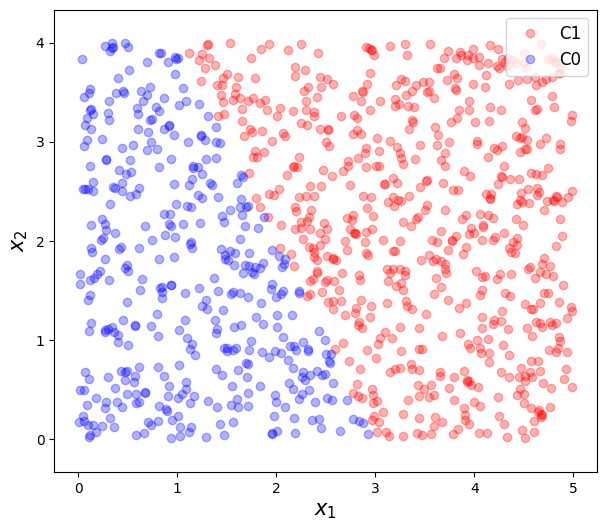

In [35]:
# datat generation

m = 1000
true_w = np.array([[-6], [2], [1]])
train_X = np.hstack([np.ones([m,1]), 5*np.random.rand(m,1), 4*np.random.rand(m,1)])

true_w = np.asmatrix(true_w)
train_X = np.asmatrix(train_X)

train_y = 1/(1 + np.exp(-train_X*true_w)) > 0.5

C1 = np.where(train_y == True)[0]
C0 = np.where(train_y == False)[0]

train_y = np.empty([m,1])
train_y[C1] = 1
train_y[C0] = 0

plt.figure()
plt.plot(train_X[C1,1], train_X[C1,2], 'ro', alpha = 0.3, label='C1')
plt.plot(train_X[C0,1], train_X[C0,2], 'bo', alpha = 0.3, label='C0')
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.ylim([0,4])
plt.show()

train_x: (1000, 3), w: (3, 1)
w_hat:  [-3.9695485  1.7108957  0.4341544]


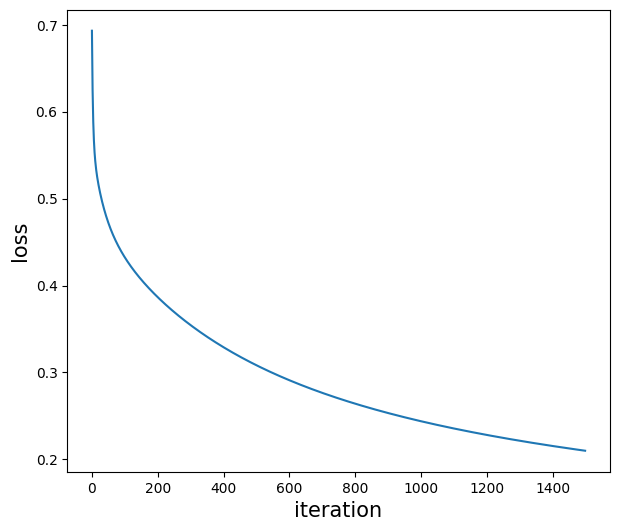

In [36]:
LR = 0.05
n_iter = 1500

w = tf.Variable([[0],[0],[0]], dtype = tf.float32)
train_x = tf.constant(train_X, dtype= tf.float32)
train_y = tf.constant(train_y, dtype= tf.float32)

print(f'train_x: {train_x.shape}, w: {w.shape}')

loss_record = []
for i in range(n_iter):
    with tf.GradientTape() as tape:
        y_pred = tf.sigmoid(tf.matmul(train_x, w))
        loss = - train_y*tf.math.log(y_pred) - (1-train_y)*tf.math.log(1-y_pred)
        loss = tf.reduce_mean(loss)
        w_grad = tape.gradient(loss, w)

    loss_record.append(loss)
    w.assign_sub(LR * w_grad)

w_hat = w.numpy().squeeze(1)
print('w_hat: ', w_hat)

plt.figure()
plt.plot(loss_record)
plt.xlabel('iteration', fontsize = 15)
plt.ylabel('loss', fontsize = 15)
plt.show()

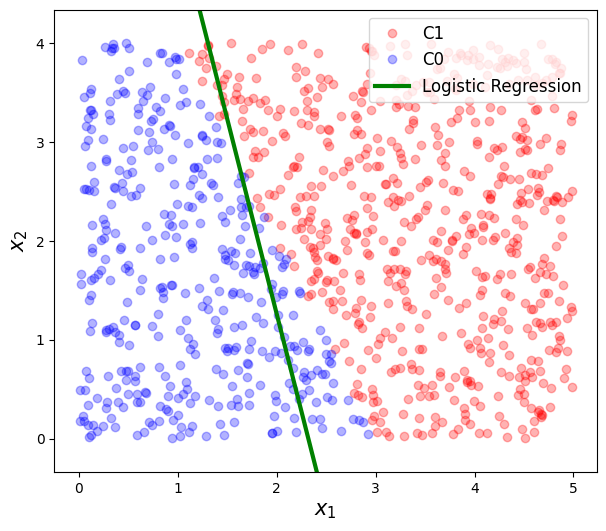

In [37]:
xp = np.arange(0, 4, 0.01).reshape(-1, 1)
yp = - w_hat[1]*xp/w_hat[2] - w_hat[0]/w_hat[2]

plt.figure()
plt.plot(train_X[C1,1], train_X[C1,2], 'ro', alpha = 0.3, label = 'C1')
plt.plot(train_X[C0,1], train_X[C0,2], 'bo', alpha = 0.3, label = 'C0')
plt.plot(xp, yp, 'g', linewidth = 3, label = 'Logistic Regression')
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.ylim([0,4])
plt.show()

### Keras: tf.keras.models
Build a model using Keras

- Regular densely-connected NN layer.
https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense

- Get Weights
https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer#get_weights

Dense implements the operation: **output = activation(dot(input, kernel) + bias)** where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True). These are all attributes of Dense.

Note: If the input to the layer has a rank greater than 2, then **Dense computes** the dot product between the inputs and the kernel along the last axis of the inputs and axis 0 of the kernel (using tf.tensordot). For example, if input has dimensions **(batch_size, d0, d1)**, then we create a kernel with shape **(d1, units)**, and the kernel operates along axis 2 of the input, on every sub-tensor of shape (1, 1, d1) (there are batch_size * d0 such sub-tensors). The output in this case will have shape *(batch_size, d0, units)**.

Epoch 1/10
32/32 [==============================] - 0s 2ms/step - loss: 1.5280
Epoch 2/10
32/32 [==============================] - 0s 1ms/step - loss: 0.5353
Epoch 3/10
32/32 [==============================] - 0s 1ms/step - loss: 0.3928
Epoch 4/10
32/32 [==============================] - 0s 1ms/step - loss: 0.3198
Epoch 5/10
32/32 [==============================] - 0s 1ms/step - loss: 0.2696
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.2387
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 0.2143
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.1964
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 0.1823
Epoch 10/10
32/32 [==============================] - 0s 1ms/step - loss: 0.1706
w: [[2.1508853]
 [0.7807276]], b: [-5.6539454]


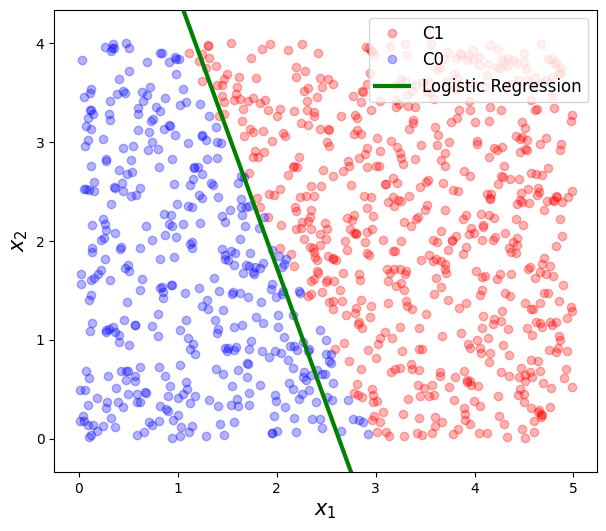

In [38]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(input_dim = 2,
                          units = 1,
                          activation = 'sigmoid')
])
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1),
                           loss = 'binary_crossentropy')

train_x = tf.constant(train_X[:,1:], dtype= tf.float32)
train_y = tf.constant(train_y, dtype= tf.float32)

loss = model.fit(train_x, train_y, epochs = 10)

w, b = model.layers[0].get_weights()
print(f'w: {w}, b: {b}')

x1p = np.arange(0, 4, 0.01).reshape(-1, 1)
x2p = - w[0,0]/w[1,0]*x1p - b[0]/w[1,0]

plt.figure()
plt.plot(train_X[C1,1], train_X[C1,2], 'ro', alpha = 0.3, label = 'C1')
plt.plot(train_X[C0,1], train_X[C0,2], 'bo', alpha = 0.3, label = 'C0')
plt.plot(x1p, x2p, 'g', linewidth = 3, label = 'Logistic Regression')
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.ylim([0,4])
plt.show()

## 2.3 Nonlinear Transformation

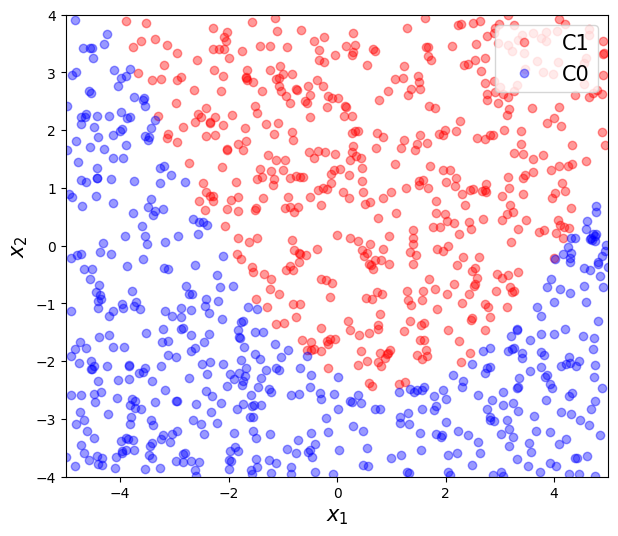

In [39]:
# training data gerneration

m = 1000
x1 = 10*np.random.rand(m, 1) - 5
x2 = 8*np.random.rand(m, 1) - 4

g = - 0.5*(x1-1)**2 + 2*x2 + 5

C1 = np.where(g >= 0)[0]
C0 = np.where(g < 0)[0]
N = C1.shape[0]
M = C0.shape[0]
m = N + M

X1 = np.hstack([x1[C1], x2[C1]])
X0 = np.hstack([x1[C0], x2[C0]])

train_X = np.vstack([X1, X0])
train_X = np.asmatrix(train_X)

train_y = np.vstack([np.ones([N,1]), np.zeros([M,1])])

plt.figure()
plt.plot(x1[C1], x2[C1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(x1[C0], x2[C0], 'bo', alpha = 0.4, label = 'C0')
plt.legend(loc = 1, fontsize = 15)
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.xlim([-5, 5])
plt.ylim([-4, 4])
plt.show()

### Build ANN Model

In [40]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(input_dim = 2, units = 2, activation = 'sigmoid'),
    tf.keras.layers.Dense(units = 1, activation = 'sigmoid')
])
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1),
                           loss = 'binary_crossentropy')
loss = model.fit(train_X, train_y, epochs = 10)

Epoch 1/10
32/32 [==============================] - 1s 2ms/step - loss: 0.5492
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 0.4012
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 0.3032
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.2044
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 0.1536
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.1279
Epoch 7/10
32/32 [==============================] - 0s 1ms/step - loss: 0.1116
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.0989
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 0.1013
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 0.1055


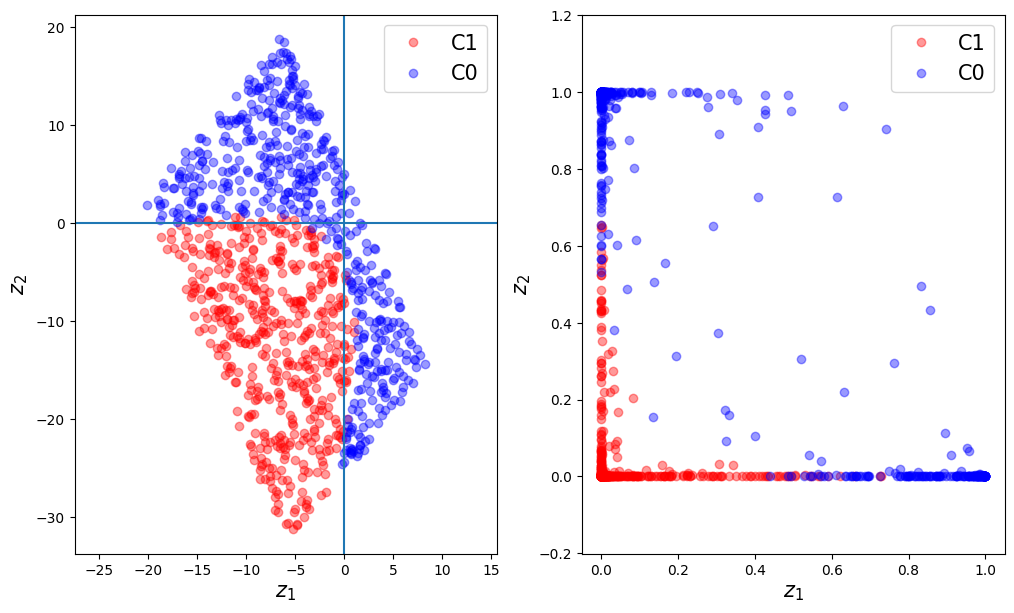

In [41]:
w1, b1 = model.layers[0].get_weights()
w2, b2 = model.layers[1].get_weights()

X = train_X
logits = train_X*w1 + b1
H = 1/(1 + np.exp(-logits))

plt.figure(figsize=(12,7))
plt.subplot(121)
plt.plot(logits[0:N,0], logits[0:N,1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(logits[N:m,0], logits[N:m,1], 'bo', alpha = 0.4, label = 'C0')
plt.xlabel('$z_1$', fontsize = 15)
plt.ylabel('$z_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 15)
plt.axis('equal')
plt.axhline(0)
plt.axvline(0)

plt.subplot(122)
plt.plot(H[0:N,0], H[0:N,1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(H[N:m,0], H[N:m,1], 'bo', alpha = 0.4, label = 'C0')
plt.xlabel('$z_1$', fontsize = 15)
plt.ylabel('$z_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 15)
plt.axis('equal')

plt.show()

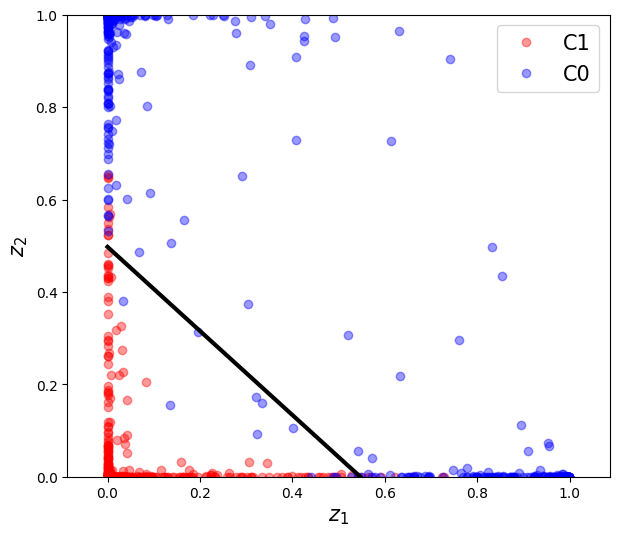

In [42]:
x1p = np.arange(0, 1, 0.01).reshape(-1, 1)
x2p = - w2[0,0]/w2[1,0]*x1p - b2[0]/w2[1,0]

plt.figure()
plt.plot(H[0:N,0], H[0:N,1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(H[N:m,0], H[N:m,1], 'bo', alpha = 0.4, label = 'C0')
plt.plot(x1p, x2p, 'k', linewidth = 3, label = '')
plt.xlabel('$z_1$', fontsize = 15)
plt.ylabel('$z_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 15)
plt.axis('equal')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

# 3.Autoencoder

## 3.1. Define a Structure of an Autoencoder
Input shape and latent variable shape
- Encoder shape
- Decoder shape

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
# Load Data

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((x_train.shape[0],28*28)) / 255
x_test = x_test.reshape((x_test.shape[0],28*28)) / 255
# Use Only 1,5,6 Digits to Visualize

train_idx1 = np.array(np.where(y_train == 1))
train_idx5 = np.array(np.where(y_train == 5))
train_idx6 = np.array(np.where(y_train == 6))
train_idx = np.sort(np.concatenate((train_idx1, train_idx5, train_idx6), axis= None))

test_idx1 = np.array(np.where(y_test == 1))
test_idx5 = np.array(np.where(y_test == 5))
test_idx6 = np.array(np.where(y_test == 6))
test_idx = np.sort(np.concatenate((test_idx1, test_idx5, test_idx6), axis= None))

train_imgs = x_train[train_idx]
train_labels = y_train[train_idx]
test_imgs = x_test[test_idx]
test_labels = y_test[test_idx]
n_train = train_imgs.shape[0]
n_test = test_imgs.shape[0]

print ("The number of training images : {}, shape : {}".format(n_train, train_imgs.shape))
print ("The number of testing images : {}, shape : {}".format(n_test, test_imgs.shape))

# Define Structure

# Encoder Structure
encoder = tf.keras.models.Sequential([
    tf.keras.layers.Dense(500, activation = 'relu', input_shape = (28*28,)),
    tf.keras.layers.Dense(300, activation = 'relu'),
    tf.keras.layers.Dense(2, activation = None)
    ])

# Decoder Structure
decoder = tf.keras.models.Sequential([
    tf.keras.layers.Dense(300, activation = 'relu', input_shape = (2,)),
    tf.keras.layers.Dense(500, activation = 'relu'),
    tf.keras.layers.Dense(28*28, activation = None)
    ])

The number of training images : 18081, shape : (18081, 784)
The number of testing images : 2985, shape : (2985, 784)


## 3.2. Define Loss and Optimizer
- Loss: Squared loss
$ \displaystyle \frac{1}{m} \sum_{i=1}^m(t_i-y_i)^2$

**Optimizer**

AdamOptimizer: the most popular optimizer

In [44]:
# Autoencoder = Encoder + Decoder
autoencoder = tf.keras.models.Sequential([encoder, decoder])

autoencoder.compile(optimizer = tf.keras.optimizers.Adam(0.001),
                    loss = 'mean_squared_error',
                    metrics = ['mse'])
# Train Model & Evaluate Test Data

training = autoencoder.fit(train_imgs, train_imgs, batch_size = 50, epochs = 10)


Epoch 1/10
362/362 [==============================] - 12s 19ms/step - loss: 0.0369 - mse: 0.0369
Epoch 2/10
362/362 [==============================] - 10s 29ms/step - loss: 0.0302 - mse: 0.0302
Epoch 3/10
362/362 [==============================] - 9s 25ms/step - loss: 0.0289 - mse: 0.0289
Epoch 4/10
362/362 [==============================] - 7s 20ms/step - loss: 0.0279 - mse: 0.0279
Epoch 5/10
362/362 [==============================] - 9s 25ms/step - loss: 0.0274 - mse: 0.0274
Epoch 6/10
362/362 [==============================] - 8s 21ms/step - loss: 0.0269 - mse: 0.0269
Epoch 7/10
362/362 [==============================] - 8s 21ms/step - loss: 0.0267 - mse: 0.0267
Epoch 8/10
362/362 [==============================] - 8s 23ms/step - loss: 0.0264 - mse: 0.0264
Epoch 9/10
362/362 [==============================] - 7s 20ms/step - loss: 0.0262 - mse: 0.0262
Epoch 10/10
362/362 [==============================] - 8s 23ms/step - loss: 0.0259 - mse: 0.0259


## 3.3. Test or Evaluate###


94/94 - 1s - loss: 0.0263 - mse: 0.0263 - 520ms/epoch - 6ms/step
Test loss: 0.02632753737270832
Mean Squared Error: 2.632753737270832 %
1/1 [==============================] - 0s 84ms/step


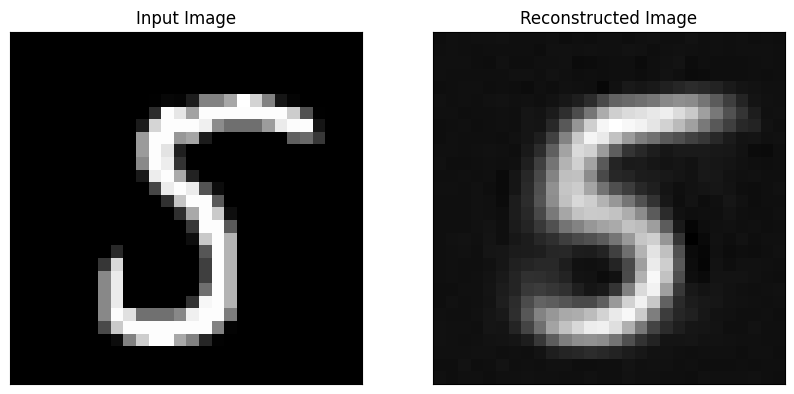

In [45]:
test_scores = autoencoder.evaluate(test_imgs, test_imgs, verbose = 2)
print('Test loss: {}'.format(test_scores[0]))
print('Mean Squared Error: {} %'.format(test_scores[1]*100))

# Visualize Evaluation on Test Data

rand_idx = np.random.randint(1, test_imgs.shape[0])
# rand_idx = 6

test_img = test_imgs[rand_idx]
reconst_img = autoencoder.predict(test_img.reshape(1,28*28))

plt.figure(figsize = (10, 8))
plt.subplot(1,2,1)
plt.imshow(test_img.reshape(28,28), 'gray')
plt.title('Input Image', fontsize = 12)

plt.xticks([])
plt.yticks([])
plt.subplot(1,2,2)
plt.imshow(reconst_img.reshape(28,28), 'gray')
plt.title('Reconstructed Image', fontsize = 12)
plt.xticks([])
plt.yticks([])

plt.show()

## 3.4. Latent Space and Generation

16/16 [==============================] - 0s 3ms/step


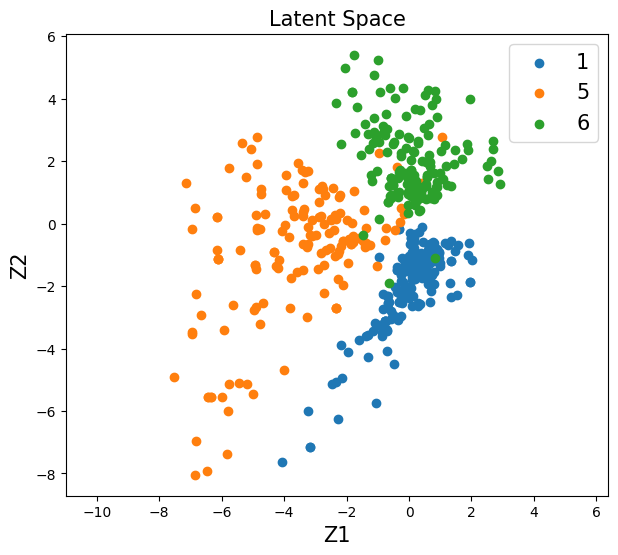

In [46]:
idx = np.random.randint(0, len(test_labels), 500)
test_x, test_y = test_imgs[idx], test_labels[idx]
test_latent = encoder.predict(test_x)

plt.figure()
plt.scatter(test_latent[test_y == 1,0], test_latent[test_y == 1,1], label = '1')
plt.scatter(test_latent[test_y == 5,0], test_latent[test_y == 5,1], label = '5')
plt.scatter(test_latent[test_y == 6,0], test_latent[test_y == 6,1], label = '6')
plt.title('Latent Space', fontsize=15)
plt.xlabel('Z1', fontsize=15)
plt.ylabel('Z2', fontsize=15)
plt.legend(fontsize = 15)
plt.axis('equal')
plt.show()

## 3.5 Data Generation

It generates something that makes sense.

These results are unsatisfying, because the density model used on the latent space ℱ is too simple and inadequate.

Building a “good” model amounts to our original problem of modeling an empirical distribution, although it may now be in a lower dimension space.

This is a motivation to VAE or GAN.

1/1 [==============================] - 0s 65ms/step


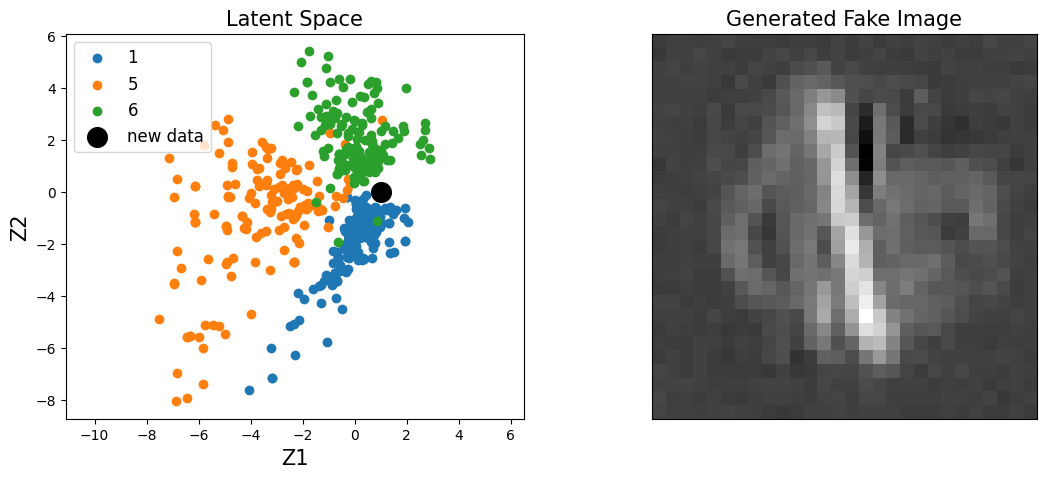

In [47]:
new_data = np.array([[1, 0]])

fake_image = decoder.predict(new_data)

plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.scatter(test_latent[test_y == 1,0], test_latent[test_y == 1,1], label = '1')
plt.scatter(test_latent[test_y == 5,0], test_latent[test_y == 5,1], label = '5')
plt.scatter(test_latent[test_y == 6,0], test_latent[test_y == 6,1], label = '6')
plt.scatter(new_data[:,0], new_data[:,1], c = 'k', marker = 'o', s = 200, label = 'new data')
plt.title('Latent Space', fontsize = 15)
plt.xlabel('Z1', fontsize = 15)
plt.ylabel('Z2', fontsize = 15)
plt.legend(loc = 2, fontsize = 12)
plt.axis('equal')
plt.subplot(1,2,2)
plt.imshow(fake_image.reshape(28,28), 'gray')
plt.title('Generated Fake Image', fontsize = 15)
plt.xticks([])
plt.yticks([])
plt.show()